<a href="https://colab.research.google.com/github/EduardoYaguar/act1_2p_si_eda_2_25_yaguar/blob/main/act1_2p_si_eda_2_25_yaguar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Activity 1: Exploratory Analysis
## Patient Readmission to Hospital After Discharge
By: Eduardo Yaguar

#Section 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Section 2: Data Loading

In [2]:
df = pd.read_csv('diabetic_data.csv')

print(f'Total of records: {df.shape[0]}')
print(f'Total of features: {df.shape[1]}')



Total of records: 101766
Total of features: 50


#Section 3: Data Exploration

In [3]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
#Summary of the numerical features in the dataset
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
#Get a better perspective of the amount of the type of values that the dataset uses
df.dtypes.value_counts()

,count
object,37
int64,13


In [6]:
#Check the target variable data
print('Number of readmitted patients\n', df['readmitted'].value_counts(), '\n')
print('Percentage of readmitted patients\n',df['readmitted'].value_counts(normalize=True) * 100)

Number of readmitted patients
 readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64 

Percentage of readmitted patients
 readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64


#Section 4: Data Cleaning

In [7]:
#Missing data is filled with the simbol ?
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
#Search for the amount of missing data in the columns
missing_data = np.array([(column, df[column][df[column] == '?'].count())  for column in df.columns])
missing_data

array([['encounter_id', '0'],
       ['patient_nbr', '0'],
       ['race', '2273'],
       ['gender', '0'],
       ['age', '0'],
       ['weight', '98569'],
       ['admission_type_id', '0'],
       ['discharge_disposition_id', '0'],
       ['admission_source_id', '0'],
       ['time_in_hospital', '0'],
       ['payer_code', '40256'],
       ['medical_specialty', '49949'],
       ['num_lab_procedures', '0'],
       ['num_procedures', '0'],
       ['num_medications', '0'],
       ['number_outpatient', '0'],
       ['number_emergency', '0'],
       ['number_inpatient', '0'],
       ['diag_1', '21'],
       ['diag_2', '358'],
       ['diag_3', '1423'],
       ['number_diagnoses', '0'],
       ['max_glu_serum', '0'],
       ['A1Cresult', '0'],
       ['metformin', '0'],
       ['repaglinide', '0'],
       ['nateglinide', '0'],
       ['chlorpropamide', '0'],
       ['glimepiride', '0'],
       ['acetohexamide', '0'],
       ['glipizide', '0'],
       ['glyburide', '0'],
       ['tolbutamid

In [9]:
#Get a better view of the amount of missing data and the impact on the data. So i can identify find a propper technique to hanlde the dataset
missing_df = pd.DataFrame(list(missing_data), columns=['column', 'missing_data'])
missing_df['percentage'] = (missing_df['missing_data'].astype(int) / len(df)) * 100
missing_df = missing_df.sort_values('missing_data', ascending=False)
missing_df

,column,missing_data,percentage
5,weight,98569,96.858479
11,medical_specialty,49949,49.082208
10,payer_code,40256,39.557416
19,diag_2,358,0.351787
2,race,2273,2.233555
18,diag_1,21,0.020636
20,diag_3,1423,1.398306
0,encounter_id,0,0.000000
38,tolazamide,0,0.000000
31,glyburide,0,0.000000


In [10]:
#Search for null values in the dataset
df.isnull().sum()[df.isnull().sum() > 0]

,0
max_glu_serum,96420
A1Cresult,84748


In [11]:
#Check if there is any duplicated data in the dataset
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

In [12]:
#Check for patients readmission
print(f'Duplicate patient_nbr: ', df['patient_nbr'].duplicated().sum())

Duplicate patient_nbr:  30248


In [13]:
#List all the numerical columns
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                  'num_medications', 'number_outpatient', 'number_emergency',
                  'number_inpatient', 'number_diagnoses']

outlier= []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier.append({
        'column': col,
        'outliers': outliers,
        'percentage': (outliers / len(df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    })
outlier_df = pd.DataFrame(outlier)
outlier_df

,column,outliers,percentage,lower_bound,upper_bound
0,time_in_hospital,2252,2.212920,-4.0,12.0
1,num_lab_procedures,143,0.140518,-8.0,96.0
2,num_procedures,4954,4.868031,-3.0,5.0
3,num_medications,2557,2.512627,-5.0,35.0
4,number_outpatient,16739,16.448519,0.0,0.0
5,number_emergency,11383,11.185465,0.0,0.0
6,number_inpatient,7049,6.926675,-1.5,2.5
7,number_diagnoses,281,0.276124,1.5,13.5


In [14]:
#Check for Age Values since its saved in ranges, gender values, race values
print(df['age'].unique(), '\n')

print(df['gender'].value_counts(), '\n')

print(df['race'].value_counts())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64 

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


#Section 5: Data Manipulation

In [15]:
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].replace('?', np.nan)

In [16]:
if 'weight' in df_clean.columns:
    weight_missing_pct = (df_clean['weight'].isnull().sum() / len(df_clean)) * 100
    df_clean['weight'] = df_clean['weight'].fillna('unknown')

if 'payer_code' in df_clean.columns:
    payer_missing_pct = (df_clean['payer_code'].isnull().sum() / len(df_clean)) * 100
    df_clean['payer_code'] = df_clean['payer_code'].fillna('unknown')

if 'medical_specialty' in df_clean.columns:
    specialty_missing_pct = (df_clean['medical_specialty'].isnull().sum() / len(df_clean)) * 100
    df_clean['medical_specialty'] = df_clean['medical_specialty'].fillna('unknown')


if 'race' in df_clean.columns:
    race_missing_pct = (df_clean['race'].isnull().sum() / len(df_clean)) * 100
    df_clean['race'] = df_clean['race'].fillna('unknown')

for diag_col in ['diag_1', 'diag_2', 'diag_3']:
    if diag_col in df_clean.columns:
        diag_missing_pct = (df_clean[diag_col].isnull().sum() / len(df_clean)) * 100
        if diag_missing_pct > 0:
            df_clean[diag_col] = df_clean[diag_col].fillna('unknown')

In [17]:
df_clean.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [18]:
#Verify unique values for variables max_glu_serum and A1Cresult
print(df['max_glu_serum'].unique(), '\n')
print(df['A1Cresult'].unique(), '\n')

[nan '>300' 'Norm' '>200'] 

[nan '>7' '>8' 'Norm'] 



#Section 6: Univariate Analysis

In [19]:
readmit_counts = df_clean['readmitted'].value_counts()
readmit_pct = df_clean['readmitted'].value_counts(normalize=True) * 100
for value, count in readmit_counts.items():
    pct = readmit_pct[value]
    print(f"  {value:>5}: {count:>6,} ({pct:>5.2f}%)")

     NO: 54,864 (53.91%)
    >30: 35,545 (34.93%)
    <30: 11,357 (11.16%)


In [20]:
numerical_stats = df_clean[numerical_cols].describe().T
numerical_stats['skewness'] = df_clean[numerical_cols].skew()
numerical_stats['kurtosis'] = df_clean[numerical_cols].kurtosis()
numerical_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0,1.133999,0.850251
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0,-0.236544,-0.245074
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0,1.316415,0.857110
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0,1.326672,3.468155
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0,8.832959,147.907736
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0,22.855582,1191.686726
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0,3.614139,20.719397
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0,-0.876746,-0.079056


In [21]:
categorical_cols = ['race', 'gender', 'age', 'admission_type_id',
                   'discharge_disposition_id', 'admission_source_id']

for col in categorical_cols:
    if col in df_clean.columns:
        print(f"\n{col.upper()}:")
        value_counts = df_clean[col].value_counts()
        print(value_counts.head(10))


RACE:
race
Caucasian          76099
AfricanAmerican    19210
unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

GENDER:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

AGE:
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

ADMISSION_TYPE_ID:
admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

DISCHARGE_DISPOSITION_ID:
discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
Name: count, dtype: int64

ADMISSION_SOURCE_ID:
admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3  

In [22]:
medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                  'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
                  'rosiglitazone', 'insulin']

for med in medication_cols:
    if med in df_clean.columns:
        print(f"\n{med}:")
        print(df_clean[med].value_counts())


metformin:
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

repaglinide:
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64

nateglinide:
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: count, dtype: int64

chlorpropamide:
chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: count, dtype: int64

glimepiride:
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64

glipizide:
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64

glyburide:
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64

pioglitazone:
pioglitazone
No        94438
Steady     6976
Up          234
Down        118
Name: count, dtype: int64

rosiglitazone:
rosiglitazone
No        95401
Steady     6100
Up

In [23]:
print(df_clean['diabetesMed'].value_counts())
print(df_clean['diabetesMed'].value_counts(normalize=True) * 100)

diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64
diabetesMed
Yes    77.003125
No     22.996875
Name: proportion, dtype: float64


In [43]:
df_clean.to_csv('diabetic_data_cleaned.csv', index=False)

#Section 7: Bivariate Analysis

In [24]:
#Compare the readmission with the age
age_readmit = pd.crosstab(df_clean['age'], df_clean['readmitted'], normalize='index') * 100
age_readmit

readmitted,<30,>30,NO
age,,,
[0-10),1.863354,16.149068,81.987578
[10-20),5.788712,32.416787,61.794501
[20-30),14.242607,30.778515,54.978877
[30-40),11.231788,31.443709,57.324503
[40-50),10.604027,33.846154,55.549819
[50-60),9.666203,34.289522,56.044274
[60-70),11.128408,35.124316,53.747276
[70-80),11.773055,36.347246,51.879699
[80-90),12.083503,36.186544,51.729953


In [25]:
#Compare readmission with time in hospital
time_by_readmit = df_clean.groupby('readmitted')['time_in_hospital'].agg(['mean', 'median', 'std'])
time_by_readmit

,mean,median,std
readmitted,,,
<30,4.768249,4.0,3.028165
>30,4.495541,4.0,2.988064
NO,4.254429,3.0,2.964964


In [26]:
#Compare readmission with the number of medication
meds_by_readmit = df_clean.groupby('readmitted')['num_medications'].agg(['mean', 'median', 'std'])
meds_by_readmit

,mean,median,std
readmitted,,,
<30,16.903143,16.0,8.096696
>30,16.282768,15.0,7.618829
NO,15.670367,14.0,8.427628


In [27]:
#Compare readmission with deabetes medication
diabmed_readmit = pd.crosstab(df_clean['diabetesMed'], df_clean['readmitted'], normalize='index') * 100
diabmed_readmit

readmitted,<30,>30,NO
diabetesMed,,,
No,9.597060,30.880656,59.522283
Yes,11.626661,36.136952,52.236387


In [28]:
#Compare readmission by gender
gender_readmit = pd.crosstab(df_clean['gender'], df_clean['readmitted'], normalize='index') * 100
gender_readmit

readmitted,<30,>30,NO
gender,,,
Female,11.245156,35.676683,53.078160
Male,11.061524,34.060142,54.878334
Unknown/Invalid,0.000000,0.000000,100.000000


In [29]:
#Compare readmission by race
race_readmit = pd.crosstab(df_clean['race'], df_clean['readmitted'], normalize='index') * 100
race_readmit

readmitted,<30,>30,NO
race,,,
AfricanAmerican,11.218116,34.534097,54.247788
Asian,10.140406,25.117005,64.742590
Caucasian,11.290556,35.643044,53.066400
Hispanic,10.407462,31.516937,58.075601
Other,9.628154,29.614874,60.756972
unknown,8.271007,23.669160,68.059833


#Section 8 : Multivariate Analysis

In [30]:
correlation_matrix = df_clean[numerical_cols].corr()
correlation_matrix

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


In [31]:
#Finding high correlations in numerical columns
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr)
    high_corr_df.sort_values('Correlation', ascending=False)
else:
  print("There are no correlation above 0.5")


There are no correlation above 0.5


In [32]:
#Check readmission by comparing age and diabetes med
multi_analysis = pd.crosstab([df_clean['age'], df_clean['diabetesMed']], df_clean['readmitted'], normalize='index') * 100
multi_analysis

readmitted                  <30        >30         NO
age      diabetesMed                                 
[0-10)   No            0.000000  10.714286  89.285714
         Yes           2.255639  17.293233  80.451128
[10-20)  No            3.296703  27.472527  69.230769
         Yes           6.166667  33.166667  60.666667
[20-30)  No            9.649123  29.239766  61.111111
         Yes          15.437262  31.178707  53.384030
[30-40)  No            9.287257  26.241901  64.470842
         Yes          11.863812  33.134433  55.001755
[40-50)  No            9.122807  30.087719  60.789474
         Yes          11.060095  35.003376  53.936529
[50-60)  No            8.378729  31.206226  60.415045
         Yes          10.036564  35.176479  54.786956
[60-70)  No           10.262726  31.547619  58.189655
         Yes          11.367895  36.113793  52.518312
[70-80)  No           10.566616  31.801940  57.631445
         Yes          12.124214  37.670249  50.205537
[80-90)  No            9.339248  31.006304  59.654448
         Yes          12.993650  37.904600  49.101750
[90-100) No            8.480565  27.444052  64.075383
         Yes          12.242798  29.578189  58.179012

In [33]:
#Compare the admission type with the readmission
admission_readmit = pd.crosstab(df_clean['admission_type_id'], df_clean['readmitted'], normalize='index') * 100
admission_readmit

readmitted,<30,>30,NO
admission_type_id,,,
1,11.522504,35.764030,52.713465
2,11.179654,34.913420,53.906926
3,10.392708,30.452064,59.155228
4,10.000000,20.000000,70.000000
5,10.344828,35.966562,53.688610
6,11.075411,42.165942,46.758647
7,0.000000,0.000000,100.000000
8,8.437500,26.250000,65.312500


#Section 9: Data Visualization

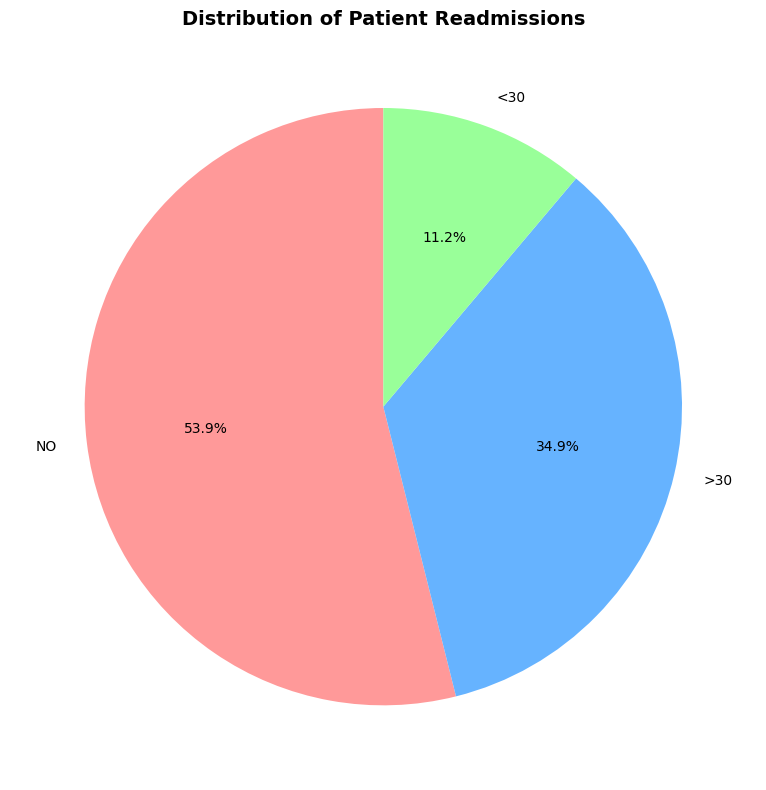

In [34]:
# Distribution of Patient Readmissions
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99']

readmit_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%',
                    colors=colors, startangle=90)
ax.set_title('Distribution of Patient Readmissions', fontsize=14, fontweight='bold')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig('readmission_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

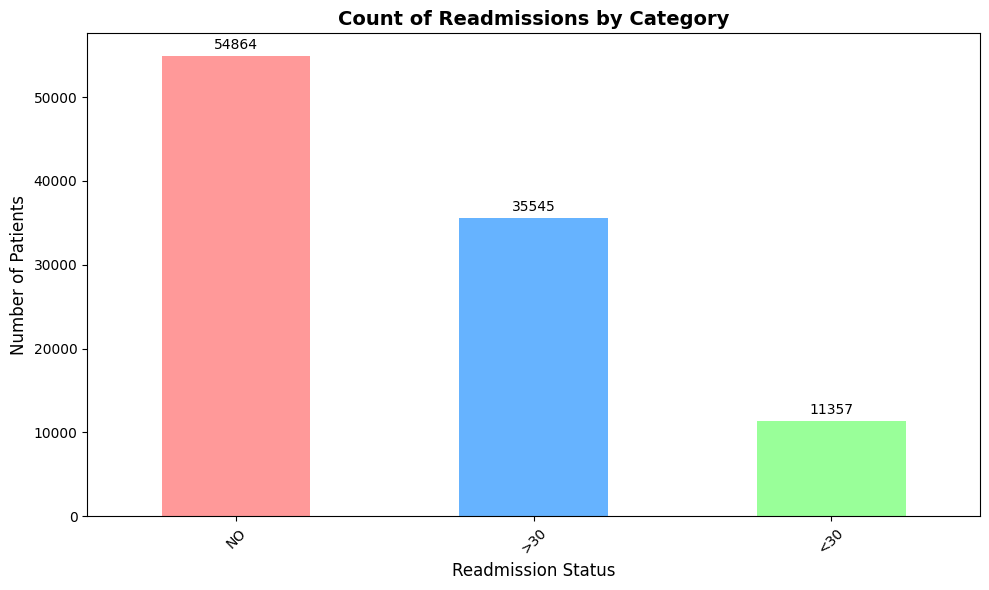

In [35]:
# Count of Readmissions by Category
fig, ax = plt.subplots(figsize=(10, 6))

readmit_counts.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Count of Readmissions by Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Readmission Status', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

plt.tight_layout()
plt.savefig('readmission_distribution_bar.png', dpi=300, bbox_inches='tight')
plt.show()

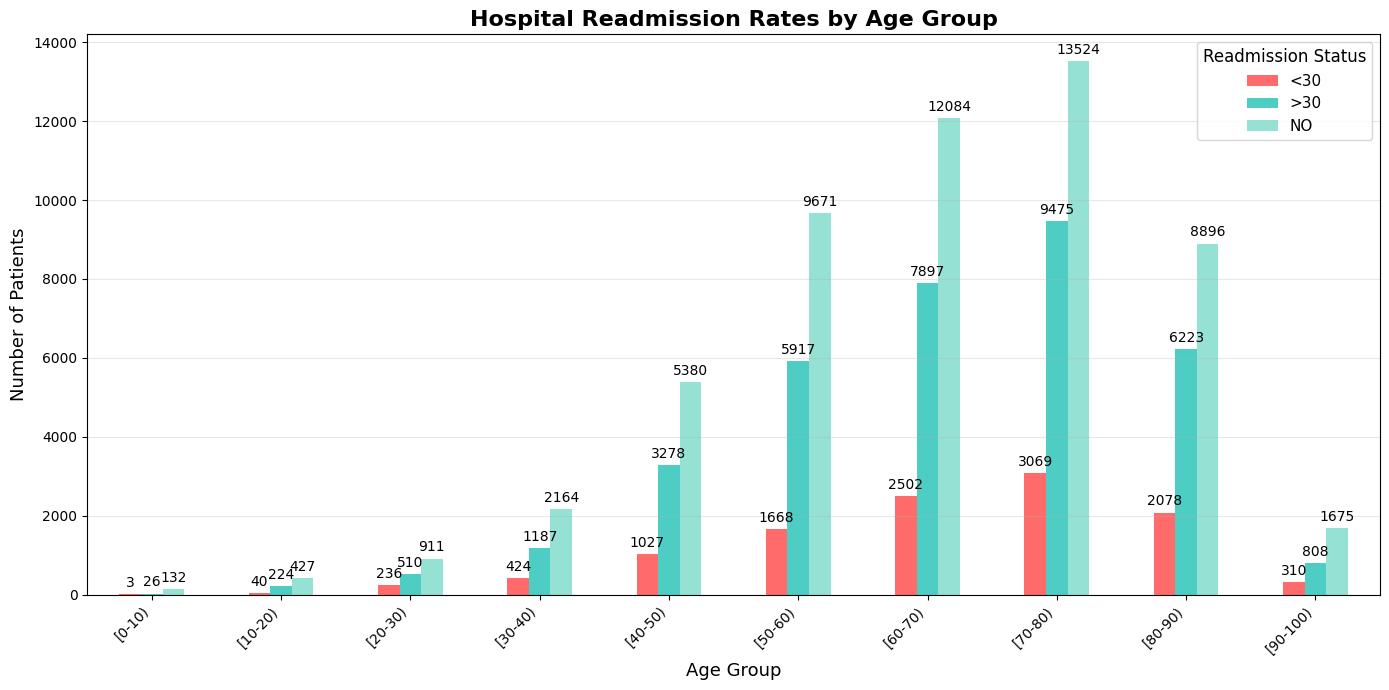

In [36]:
#Hospital Readmission Rates by Age Group
fig, ax = plt.subplots(figsize=(14, 7))
colors =['#ff6b6b', '#4ecdc4', '#95e1d3']
age_readmit_counts = pd.crosstab(df_clean['age'], df_clean['readmitted'])
age_readmit_counts.plot(kind='bar', ax=ax, color= colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

ax.set_title('Hospital Readmission Rates by Age Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=13)
ax.set_ylabel('Number of Patients', fontsize=13)
ax.legend(title='Readmission Status', title_fontsize=12, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('readmission_by_age.png', dpi=300, bbox_inches='tight')
plt.show()


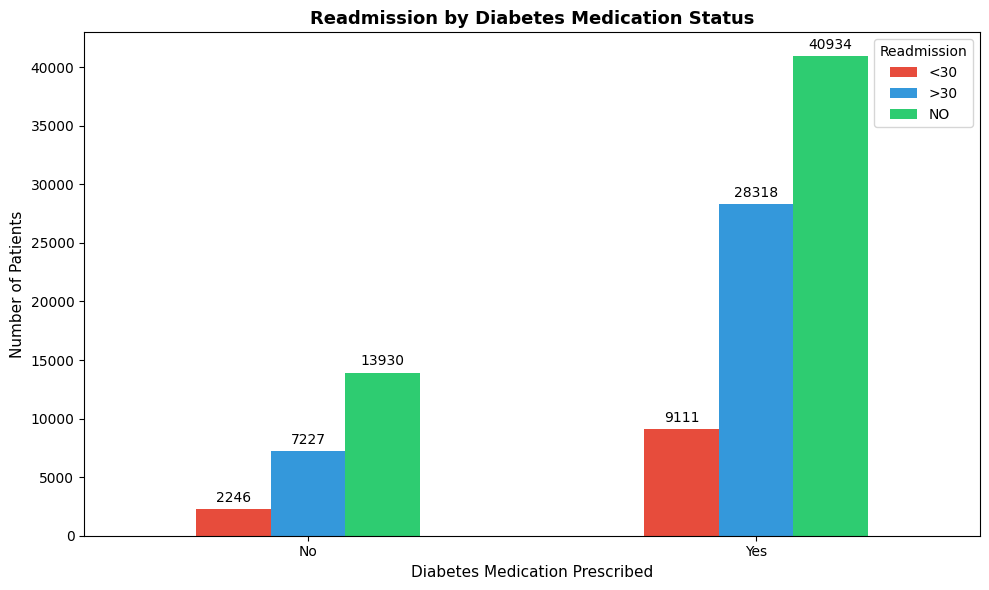

In [37]:
# Readmission by Diabetes Medication Status
fig, ax = plt.subplots(figsize=(10, 6))
colors=['#e74c3c', '#3498db', '#2ecc71']
diabmed_readmit_counts = pd.crosstab(df_clean['diabetesMed'], df_clean['readmitted'])
diabmed_readmit_counts.plot(kind='bar', ax=ax, color=colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

ax.set_title('Readmission by Diabetes Medication Status', fontsize=13, fontweight='bold')
ax.set_xlabel('Diabetes Medication Prescribed', fontsize=11)
ax.set_ylabel('Number of Patients', fontsize=11)
ax.legend(title='Readmission')
ax.set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.savefig('readmission_by_diabetes_medication.png', dpi=300, bbox_inches='tight')
plt.show()


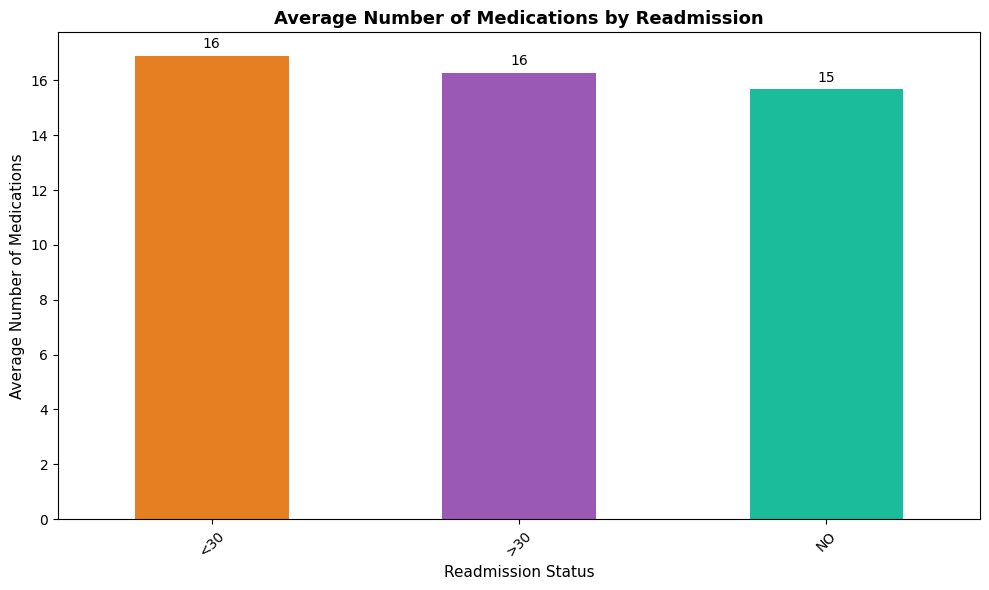

In [38]:
# Average Number of Medications by Readmission
fig, ax = plt.subplots(figsize=(10, 6))

avg_medications = df_clean.groupby('readmitted')['num_medications'].mean()
barplot = avg_medications.plot(kind='bar', ax=ax, color=['#e67e22', '#9b59b6', '#1abc9c'])

ax.set_title('Average Number of Medications by Readmission', fontsize=13, fontweight='bold')
ax.set_xlabel('Readmission Status', fontsize=11)
ax.set_ylabel('Average Number of Medications', fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

plt.tight_layout()
plt.savefig('avg_medications_by_readmission.png', dpi=300, bbox_inches='tight')
plt.show()

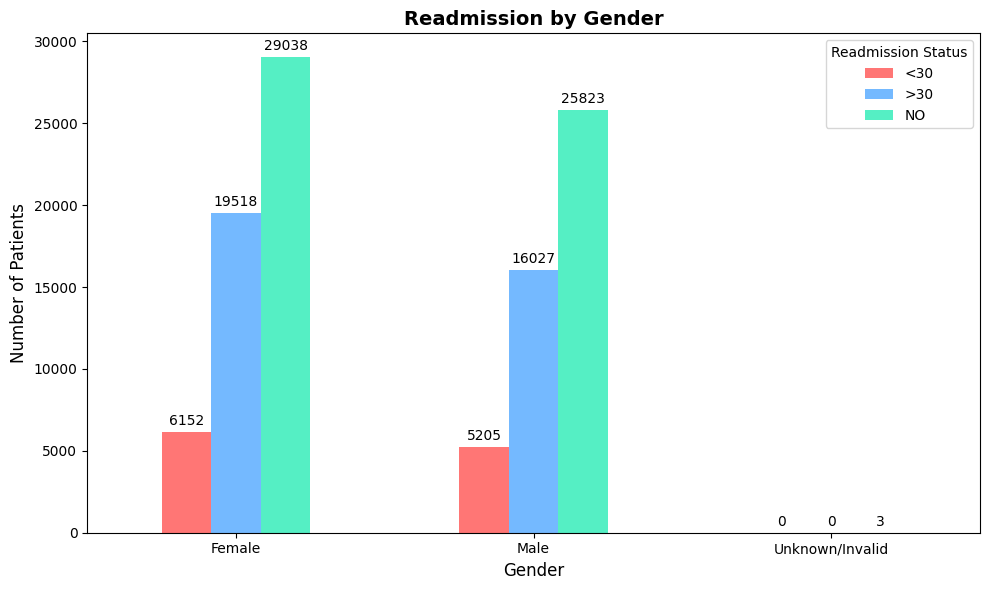

In [39]:
# Readmission by Gender
fig, ax = plt.subplots(figsize=(10, 6))
colors=['#ff7675', '#74b9ff', '#55efc4']
gender_readmit_counts = pd.crosstab(df_clean['gender'], df_clean['readmitted'])
gender_readmit_counts.plot(kind='bar', ax=ax, color=colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

ax.set_title('Readmission by Gender', fontsize=14, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
ax.legend(title='Readmission Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('readmission_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

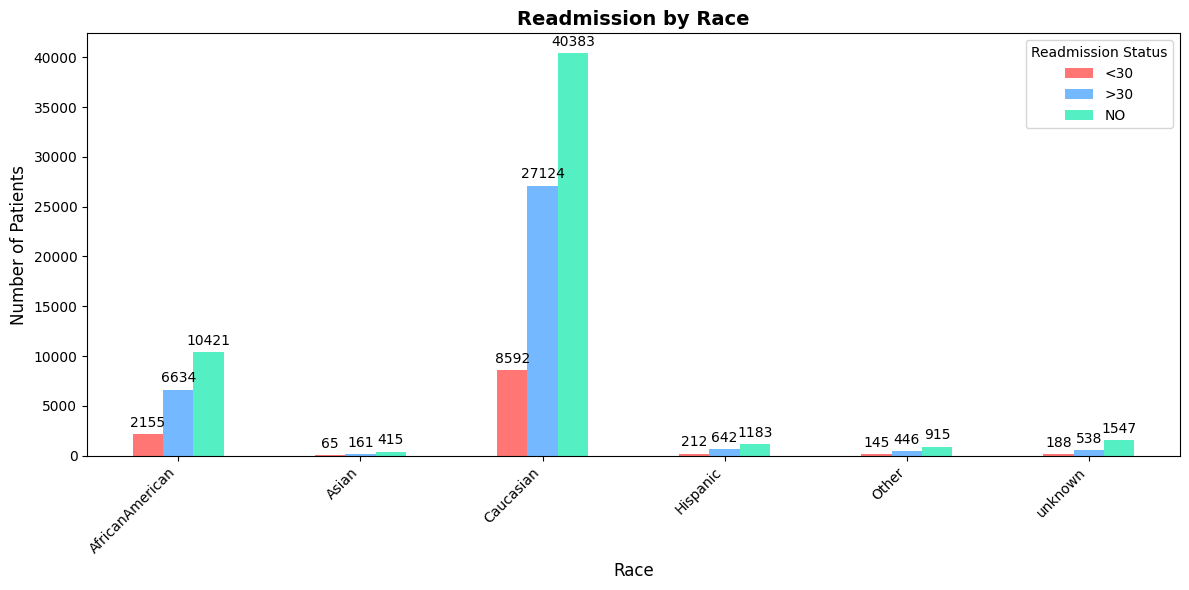

In [40]:
# Readmission by Race
fig, ax = plt.subplots(figsize=(12, 6))

race_readmit_counts = pd.crosstab(df_clean['race'], df_clean['readmitted'])
race_readmit_counts.plot(kind='bar', ax=ax, color= colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

ax.set_title('Readmission by Race', fontsize=14, fontweight='bold')
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
ax.legend(title='Readmission Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('readmission_by_race.png', dpi=300, bbox_inches='tight')
plt.show()

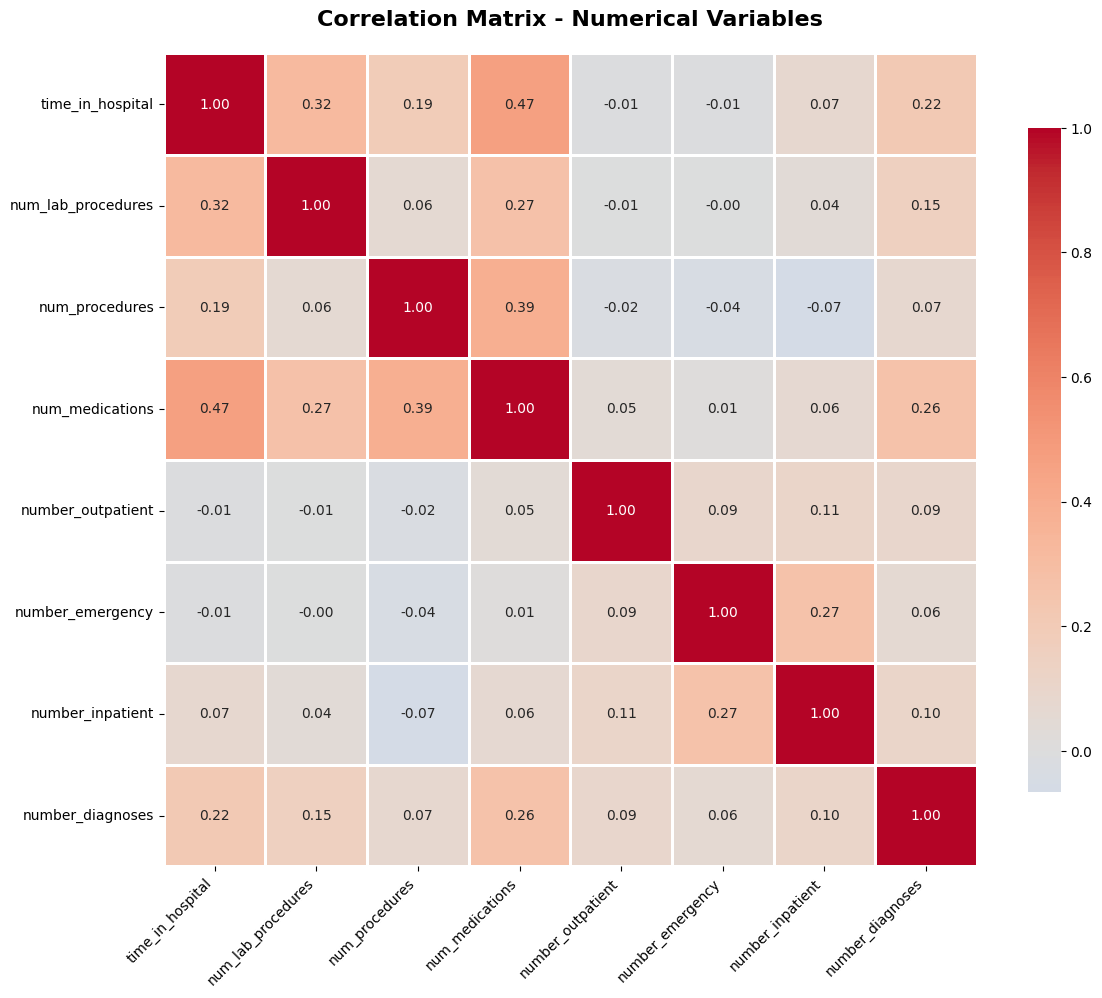

In [41]:
#Correlation Matrix for Numerical Variables
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)

ax.set_title('Correlation Matrix - Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()